# 1.1 Calculation of waterplane area
A vessel has the following half-breadths at equal intervals:

In [32]:
import pandas as pd
from mms185 import simpson
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.DataFrame()
y2=[3.0, 6.0, 8.0, 8.5, 7.8, 7.0, 5.5, 3.5, 0.0]
df['ordinate'] = np.arange(len(y2))
df['y/2'] = y2


In [17]:
df

,ordinate,y/2
0,0,3.0
1,1,6.0
2,2,8.0
3,3,8.5
4,4,7.8
5,5,7.0
6,6,5.5
7,7,3.5
8,8,0.0


## Calculate the vessel’s waterplane area (WPA). 
(The length of the WPA is 160m.)

### Adding the stations x coordinates and plot the water plane area

In [56]:
N = len(df)
L_WPA = 160 
df['x'] = df['ordinate']/(N-1)*L_WPA

In [57]:
df

,ordinate,y/2,x
0,0,3.0,0.0
1,1,6.0,20.0
2,2,8.0,40.0
3,3,8.5,60.0
4,4,7.8,80.0
5,5,7.0,100.0
6,6,5.5,120.0
7,7,3.5,140.0
8,8,0.0,160.0


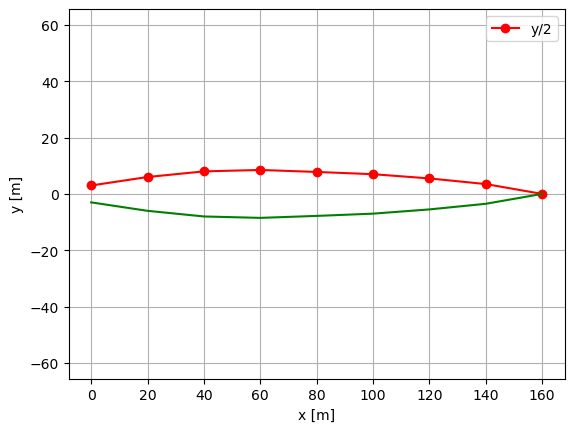

In [58]:
fig,ax=plt.subplots()
df.plot(x='x',y='y/2',style='ro-',ax=ax)
ax.plot(df['x'],-np.array(y2),color='g')
ax.axis('equal');
ax.set_ylabel("y [m]")
ax.set_xlabel("x [m]")
ax.grid(True)
ax.set_xticks(df['x']);

### Make a table with Simpson multipliers

In [59]:
simpson.simpson_table(y=df['y/2'])

,y,S/M,product
0,3.0,0.5,1.5
1,6.0,2.0,12.0
2,8.0,1.0,8.0
3,8.5,2.0,17.0
4,7.8,1.0,7.8
5,7.0,2.0,14.0
6,5.5,1.0,5.5
7,3.5,2.0,7.0
8,0.0,0.5,0.0


### Calculate the distance between the stations

In [60]:
d = L_WPA/(N-1)
d

20.0

## Calculate the half area with Simpson's rule - summing the products of the y/2 and simpson multipliers (S/M).

In [61]:
A_port = simpson.simpson(y=df['y/2'], d=20)
A_port

970.6666666666665

## Calcualting the total area, also adding the other side...

In [62]:
A = 2*A_port
A

1941.333333333333

# Answer
The water plane area (WPA) is 1941 $m^2$.